Setup

In [1]:
import pandas as pd
import numpy as np
import string
import seaborn as sns

In [2]:
!pip install -U scikit-multiflow
#resource for profanity: https://pypi.org/project/profanity-check/
!pip install alt-profanity-check
!pip install sklearn --upgrade
#resource for sentiment: https://realpython.com/python-nltk-sentiment-analysis/#using-nltks-pre-trained-sentiment-analyzer
!pip install nltk
from profanity_check import predict
import nltk
nltk.download([
"names",
"stopwords",
"state_union",
"twitter_samples",
"movie_reviews",
"averaged_perceptron_tagger",
"vader_lexicon",
"punkt"])
from nltk.sentiment import SentimentIntensityAnalyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.6/450.6 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-multiflow: filename=scikit_multiflow-0.5.3-cp310-cp310-linux_x86_64.whl size=1254683 sha256=d23247d7a1eeb4e9ae31cb68c6a015bdd3414102848014fbee17e23aabfd7745
  Stored in directory: /root/.cache/pip/wheels/6e/1b/56/45b17a6cf203d98000a45976cb0dd0c4c3f11960e6a505f231
Successfully built scikit-multiflow
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 32.2 MB/s eta 0:00:00
  Created wheel for alt-profanity-check: filename=alt_profanity_check-1.3.1-py3-none-any.whl size=1866682 sha256=4ba70c3cd468f39185adebee9cf72c4cd1d1a32a424694ff898868735afba661
  Stored in directory: /root/.cache/pip/wheels/fd/c7/5e/5579c7145bae270d6a7896320ab0575a897cc7d71e84772e26
Successfully built alt-profanity-check
  Attempting uninstall: s

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
%matplotlib notebook

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset Fixing and Modifying

In [5]:
#had to edit first row of csv file so that file was read with 3 columns and not 1
tweets = pd.read_csv("/content/drive/MyDrive/Master's Project/hatespeech_text_label_vote_RESTRICTED_100K_v2.csv")
tweets

,Tweet text Label Votes for the majority label,Unnamed: 1,Unnamed: 2
0,Beats by Dr. Dre urBeats Wired In-Ear Headphon...,spam,4
1,RT @Papapishu: Man it would fucking rule if we...,abusive,4
2,It is time to draw close to Him &#128591;&#127...,normal,4
3,if you notice me start to act different or dis...,normal,5
4,"Forget unfollowers, I believe in growing. 7 ne...",normal,3
...,...,...,...
99991,RT @shangros: my fucking queen https://t.co/wa...,abusive,5
99992,#Osteporosis treated with #PEMF - rebuild bone...,normal,3
99993,@LGUSAMobile why does my phone screen keeps fl...,normal,3
99994,#bigdata vs. #reality ... but equally applies ...,normal,5


In [6]:
#had to fix dataframe column names
tweets = tweets.rename(columns={"Tweet text  Label   Votes for the majority label": "Tweet text", "Unnamed: 1": "Label", "Unnamed: 2": "Votes for the majority label"})

In [7]:
#last column not needed
tweets.drop(tweets.columns[[2]], axis=1, inplace=True)
tweets

,Tweet text,Label
0,Beats by Dr. Dre urBeats Wired In-Ear Headphon...,spam
1,RT @Papapishu: Man it would fucking rule if we...,abusive
2,It is time to draw close to Him &#128591;&#127...,normal
3,if you notice me start to act different or dis...,normal
4,"Forget unfollowers, I believe in growing. 7 ne...",normal
...,...,...
99991,RT @shangros: my fucking queen https://t.co/wa...,abusive
99992,#Osteporosis treated with #PEMF - rebuild bone...,normal
99993,@LGUSAMobile why does my phone screen keeps fl...,normal
99994,#bigdata vs. #reality ... but equally applies ...,normal


Abusive/Hateful Tweets

In [8]:
#"spam" labels not needed
tweets = tweets[tweets['Label'] != "spam"]
tweets

,Tweet text,Label
1,RT @Papapishu: Man it would fucking rule if we...,abusive
2,It is time to draw close to Him &#128591;&#127...,normal
3,if you notice me start to act different or dis...,normal
4,"Forget unfollowers, I believe in growing. 7 ne...",normal
5,RT @Vitiligoprince: Hate Being sexually Frustr...,abusive
...,...,...
99991,RT @shangros: my fucking queen https://t.co/wa...,abusive
99992,#Osteporosis treated with #PEMF - rebuild bone...,normal
99993,@LGUSAMobile why does my phone screen keeps fl...,normal
99994,#bigdata vs. #reality ... but equally applies ...,normal


In [9]:
#check to make sure spam labels dropped
pd.unique(tweets['Label'])

array(['abusive', 'normal', 'hateful'], dtype=object)

Tweet Feature Extraction

In [10]:
tweets["@ count"] = tweets['Tweet text'].str.count('@')
tweets['Hashtag count'] = tweets['Tweet text'].str.count('#')
tweets['Retweet'] = tweets['Tweet text'].str.contains('RT')
tweets['Uppercase word count'] = tweets['Tweet text'].apply(lambda x: sum(map(str.isupper, x.split())))
tweets['Profanity count'] = tweets['Tweet text'].str.replace('\W', ' ').str.split()
tweets['Profanity count'] = tweets['Profanity count'].apply(lambda x: sum(predict(x)))
sia = SentimentIntensityAnalyzer() #Sentiment is 'compound' value from -1 to 1
tweets['Sentiment'] = tweets['Tweet text'].apply(lambda x: sia.polarity_scores(x)['compound'])

<ipython-input-10-c089ce05e4d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets["@ count"] = tweets['Tweet text'].str.count('@')
<ipython-input-10-c089ce05e4d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['Hashtag count'] = tweets['Tweet text'].str.count('#')
<ipython-input-10-c089ce05e4d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [11]:
tweets

,Tweet text,Label,@ count,Hashtag count,Retweet,Uppercase word count,Profanity count,Sentiment
1,RT @Papapishu: Man it would fucking rule if we...,abusive,1,0,True,1,1,0.1280
2,It is time to draw close to Him &#128591;&#127...,normal,0,2,False,1,0,0.0000
3,if you notice me start to act different or dis...,normal,0,0,False,0,0,0.0000
4,"Forget unfollowers, I believe in growing. 7 ne...",normal,0,0,False,1,0,-0.1260
5,RT @Vitiligoprince: Hate Being sexually Frustr...,abusive,1,0,True,2,3,-0.8689
...,...,...,...,...,...,...,...,...
99991,RT @shangros: my fucking queen https://t.co/wa...,abusive,1,0,True,1,1,0.0000
99992,#Osteporosis treated with #PEMF - rebuild bone...,normal,0,3,False,1,0,0.0000
99993,@LGUSAMobile why does my phone screen keeps fl...,normal,1,4,False,0,1,-0.9430
99994,#bigdata vs. #reality ... but equally applies ...,normal,0,3,False,0,0,0.0000


A/H Basic Tweet Analysis

In [12]:
tweets['Label'].value_counts()

normal     53851
abusive    27150
hateful     4965
Name: Label, dtype: int64

In [13]:
tweets['@ count'].value_counts()

0     42365
1     31725
2      6698
3      2572
4      1131
5       561
6       269
7       258
8       224
9       118
10       36
11        5
12        4
Name: @ count, dtype: int64

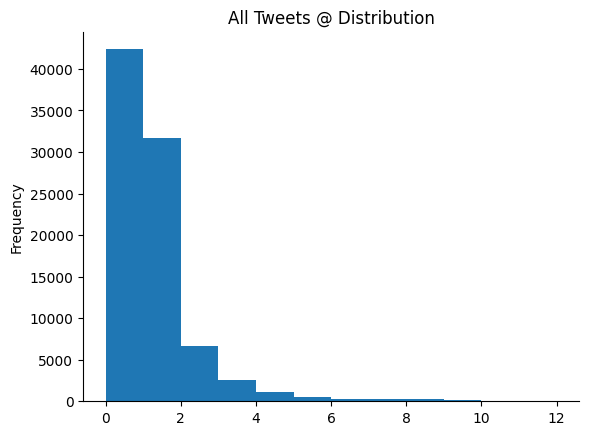

In [20]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
tweets['@ count'].plot(kind='hist', bins=12, title='All Tweets @ Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

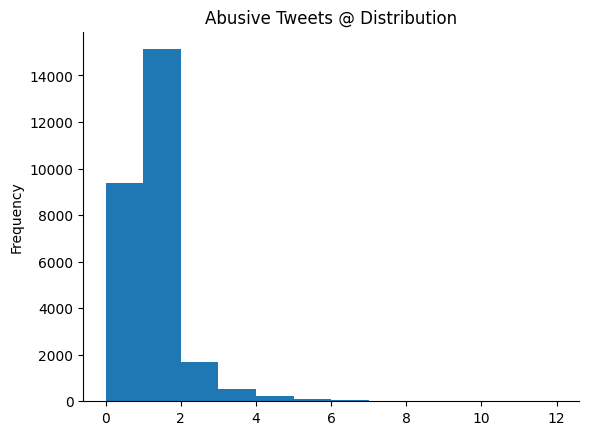

In [21]:
tweets[tweets['Label'] == "abusive"]['@ count'].plot(kind='hist', bins=12, title='Abusive Tweets @ Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

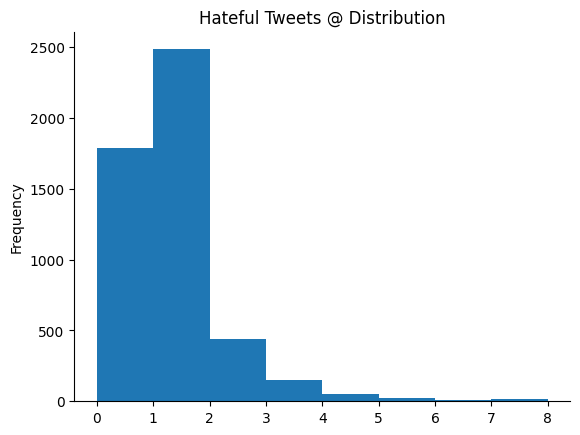

In [22]:
tweets[tweets['Label'] == "hateful"]['@ count'].plot(kind='hist', bins=8, title='Hateful Tweets @ Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

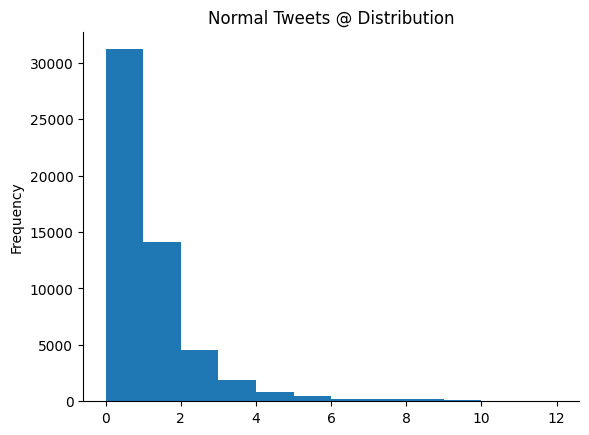

In [23]:
tweets[tweets['Label'] == "normal"]['@ count'].plot(kind='hist', bins=12, title='Normal Tweets @ Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

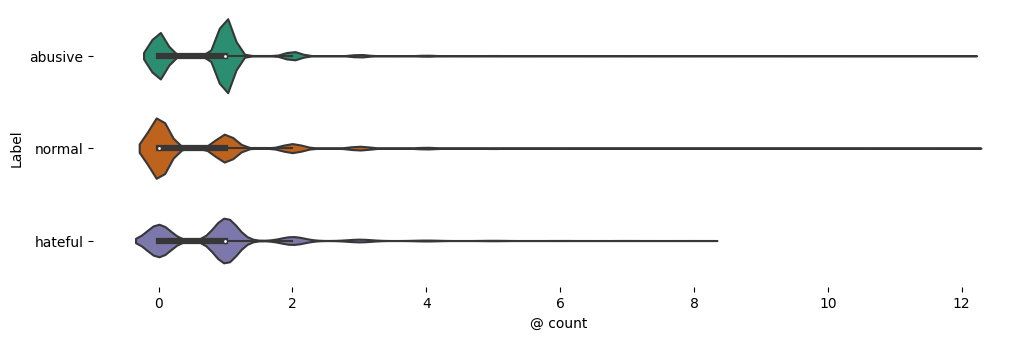

In [24]:
figsize = (12, 1.2 * len(tweets['Label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(tweets, x='@ count', y='Label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [26]:
tweets['Hashtag count'].value_counts()

0      60803
1      12445
2       6075
3       3218
4       1951
5        556
6        289
7        181
8        140
9         65
11        43
10        39
12        29
13        20
27        18
14        13
15        12
24        10
16        10
17         7
18         7
21         4
22         4
19         3
30         3
34         2
33         2
25         2
20         2
35         1
23         1
29         1
54         1
60         1
103        1
59         1
64         1
97         1
28         1
78         1
36         1
31         1
Name: Hashtag count, dtype: int64

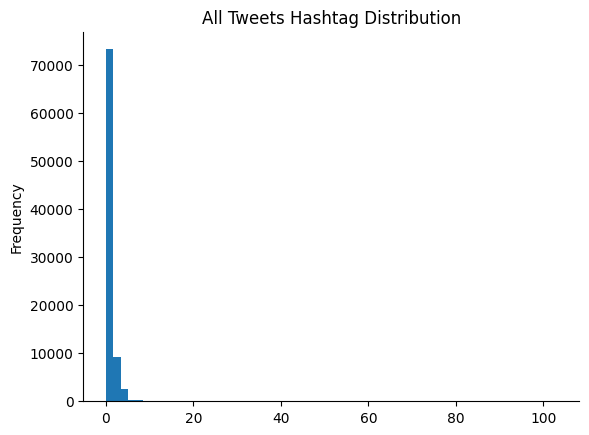

In [35]:
tweets['Hashtag count'].plot(kind='hist', bins=60, title='All Tweets Hashtag Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

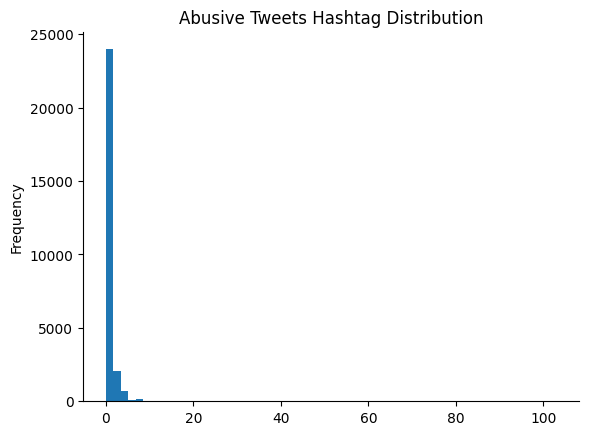

In [34]:
tweets[tweets['Label'] == "abusive"]['Hashtag count'].plot(kind='hist', bins=60, title='Abusive Tweets Hashtag Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

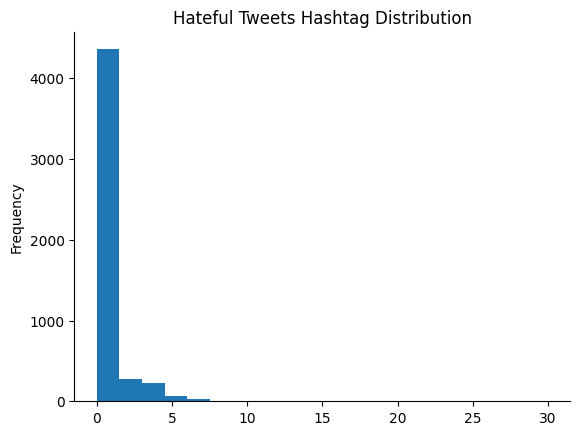

In [29]:
tweets[tweets['Label'] == "hateful"]['Hashtag count'].plot(kind='hist', bins=20, title='Hateful Tweets Hashtag Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

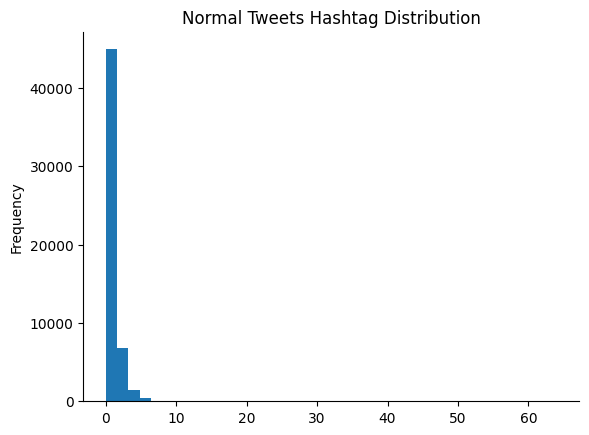

In [32]:
tweets[tweets['Label'] == "normal"]['Hashtag count'].plot(kind='hist', bins=40, title='Normal Tweets Hashtag Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

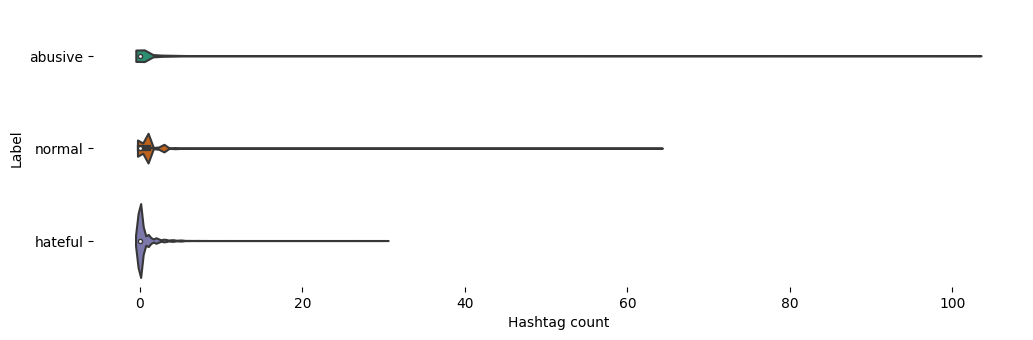

In [33]:
figsize = (12, 1.2 * len(tweets['Label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(tweets, x='Hashtag count', y='Label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [36]:
tweets['Retweet'].value_counts()

False    68674
True     17292
Name: Retweet, dtype: int64

In [37]:
#Normal Tweets Retweet Distribution
tweets[tweets['Label'] == "normal"]['Retweet'].value_counts()

False    51981
True      1870
Name: Retweet, dtype: int64

In [38]:
#Abusive Tweets Retweet Distribution
tweets[tweets['Label'] == "abusive"]['Retweet'].value_counts()

True     13601
False    13549
Name: Retweet, dtype: int64

In [39]:
#Hateful Tweets Retweet Distribution
tweets[tweets['Label'] == "hateful"]['Retweet'].value_counts()

False    3144
True     1821
Name: Retweet, dtype: int64

In [40]:
tweets['Uppercase word count'].value_counts()

0     39160
1     27513
2      9906
3      3336
4      1450
5       913
6       666
7       431
8       421
10      272
9       267
12      219
11      196
13      190
14      150
15      126
17      104
20       93
18       89
23       86
19       81
16       79
22       55
21       44
24       43
26       30
25       20
28        8
29        8
27        5
31        3
30        2
Name: Uppercase word count, dtype: int64

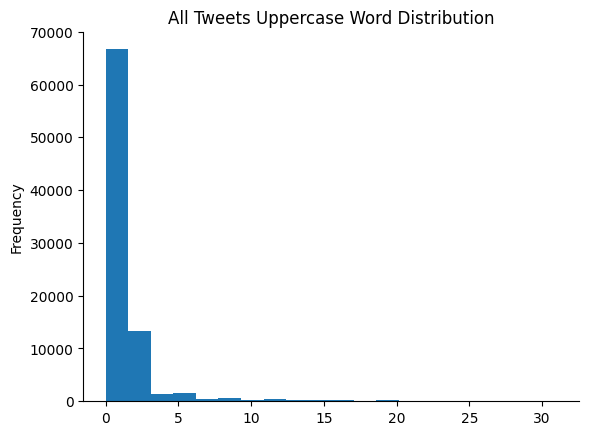

In [41]:
tweets['Uppercase word count'].plot(kind='hist', bins=20, title='All Tweets Uppercase Word Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

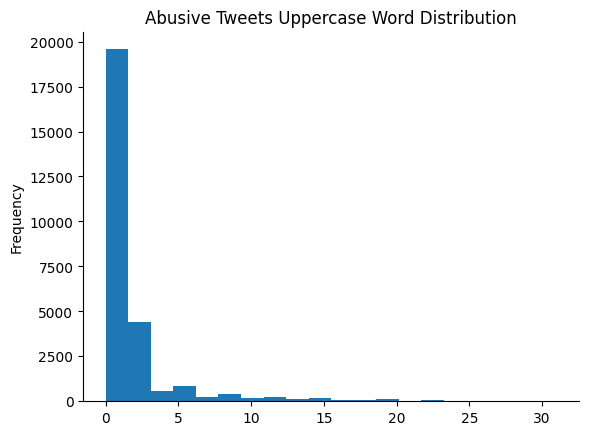

In [42]:
tweets[tweets['Label'] == "abusive"]['Uppercase word count'].plot(kind='hist', bins=20, title='Abusive Tweets Uppercase Word Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

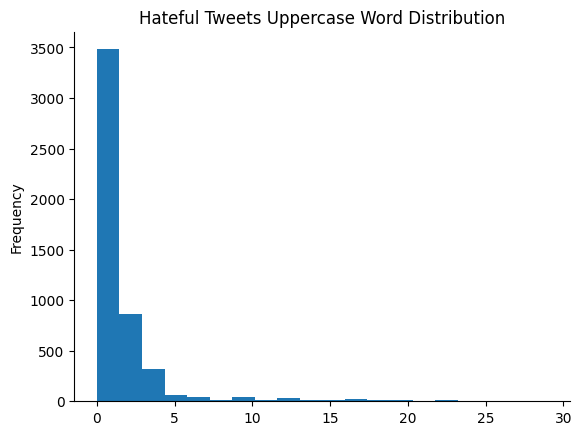

In [43]:
tweets[tweets['Label'] == "hateful"]['Uppercase word count'].plot(kind='hist', bins=20, title='Hateful Tweets Uppercase Word Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

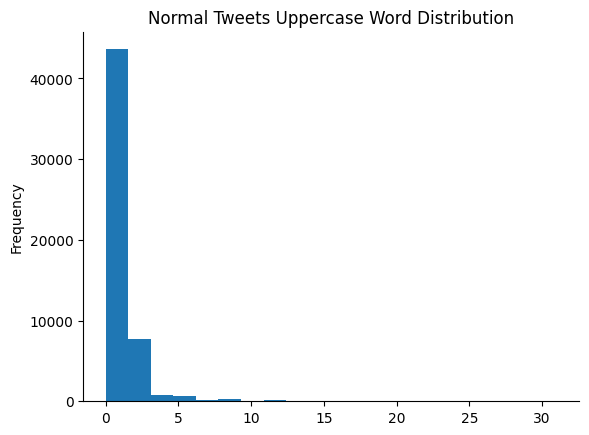

In [44]:
tweets[tweets['Label'] == "normal"]['Uppercase word count'].plot(kind='hist', bins=20, title='Normal Tweets Uppercase Word Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

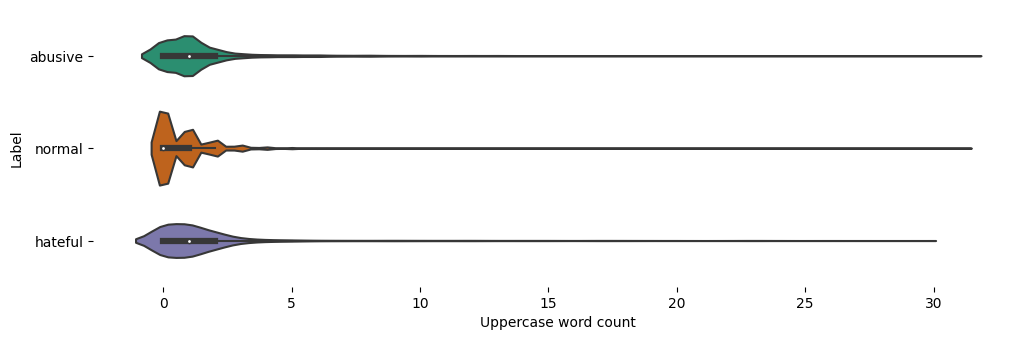

In [45]:
figsize = (12, 1.2 * len(tweets['Label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(tweets, x='Uppercase word count', y='Label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [46]:
tweets['Profanity count'].value_counts()

0     48795
1     23190
2      9546
3      3220
4       868
5       234
6        59
7        21
9        12
8        10
10        6
11        3
16        1
13        1
Name: Profanity count, dtype: int64

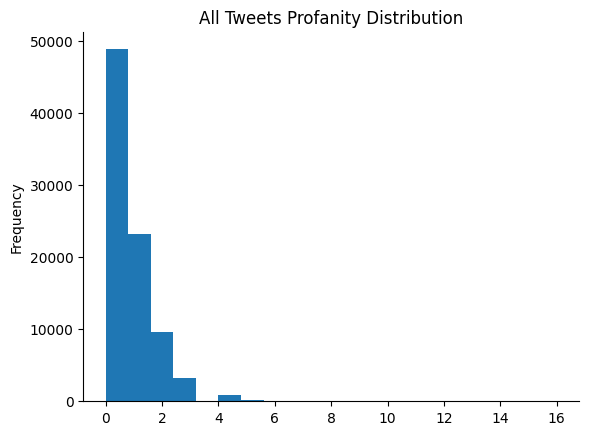

In [47]:
tweets['Profanity count'].plot(kind='hist', bins=20, title='All Tweets Profanity Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

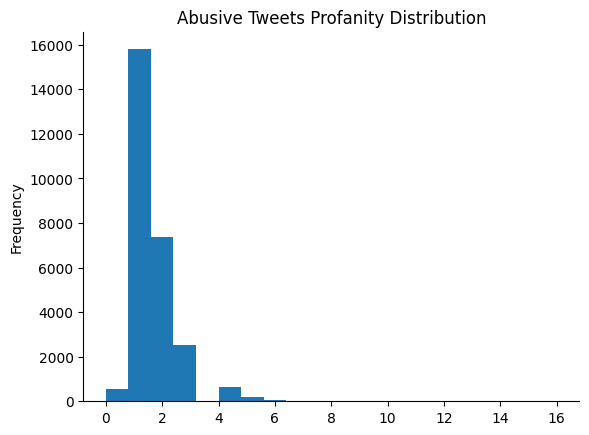

In [48]:
tweets[tweets['Label'] == "abusive"]['Profanity count'].plot(kind='hist', bins=20, title='Abusive Tweets Profanity Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

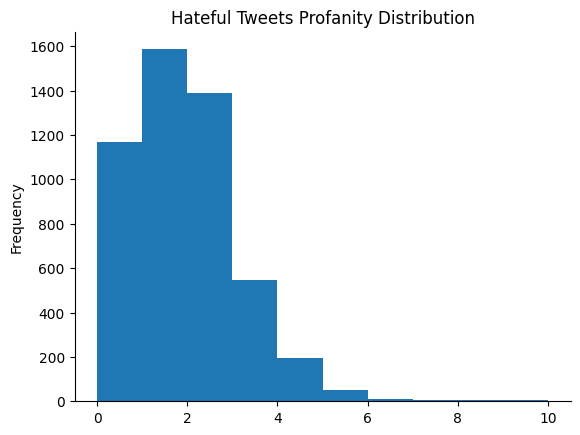

In [49]:
tweets[tweets['Label'] == "hateful"]['Profanity count'].plot(kind='hist', bins=10, title='Hateful Tweets Profanity Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

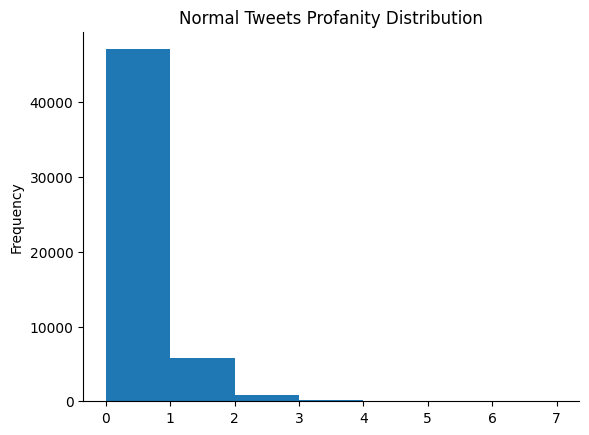

In [50]:
tweets[tweets['Label'] == "normal"]['Profanity count'].plot(kind='hist', bins=7, title='Normal Tweets Profanity Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

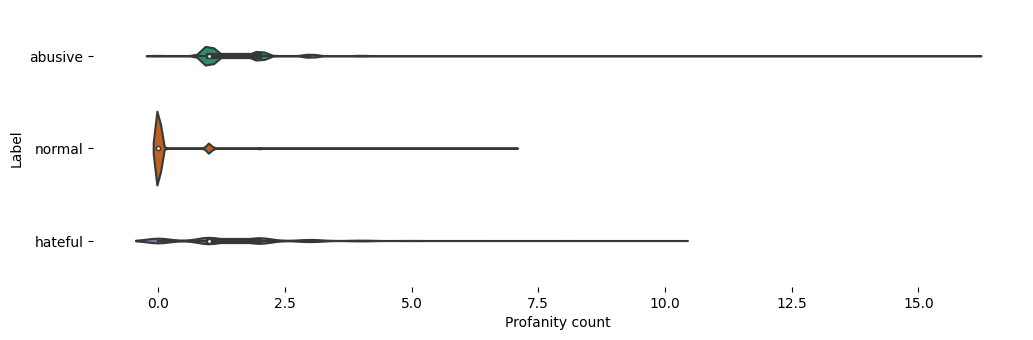

In [51]:
figsize = (12, 1.2 * len(tweets['Label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(tweets, x='Profanity count', y='Label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

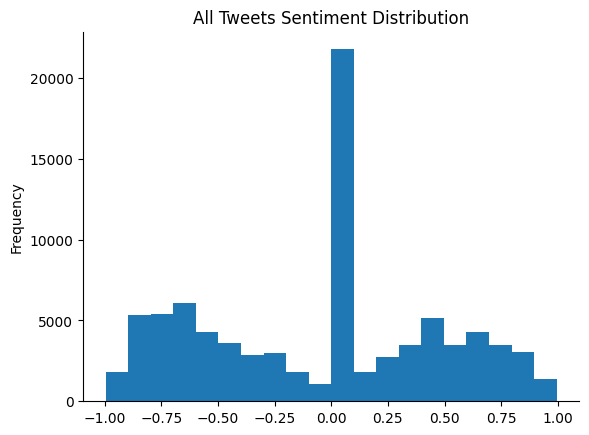

In [52]:
tweets['Sentiment'].plot(kind='hist', bins=20, title='All Tweets Sentiment Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

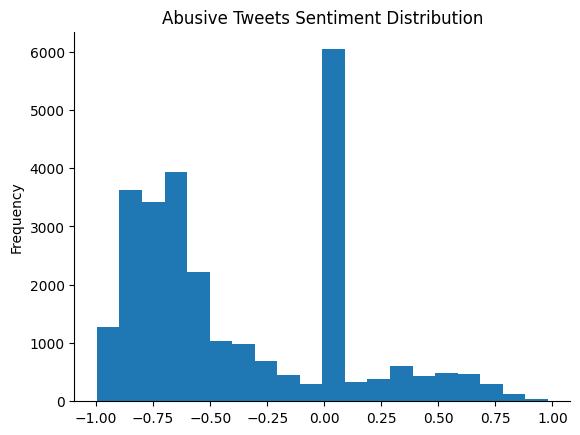

In [53]:
tweets[tweets['Label'] == "abusive"]['Sentiment'].plot(kind='hist', bins=20, title='Abusive Tweets Sentiment Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

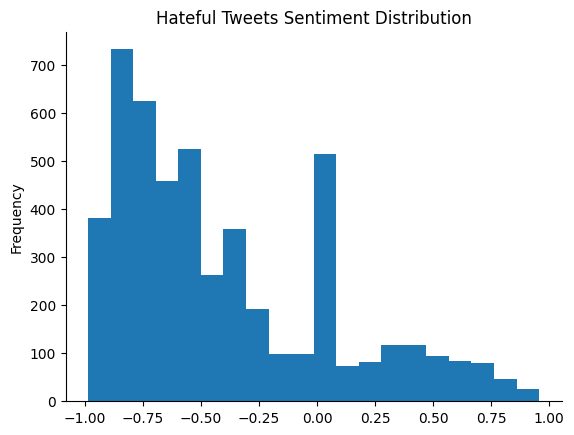

In [54]:
tweets[tweets['Label'] == "hateful"]['Sentiment'].plot(kind='hist', bins=20, title='Hateful Tweets Sentiment Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

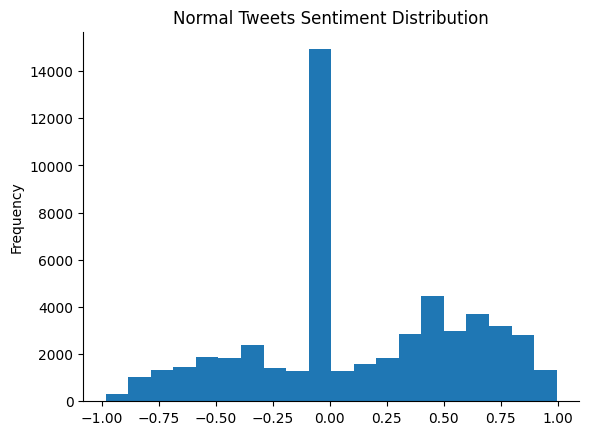

In [55]:
tweets[tweets['Label'] == "normal"]['Sentiment'].plot(kind='hist', bins=20, title='Normal Tweets Sentiment Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

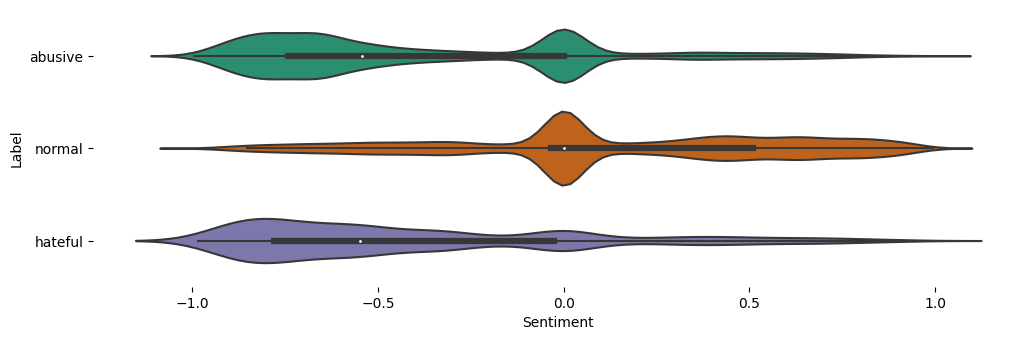

In [57]:
figsize = (12, 1.2 * len(tweets['Label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(tweets, x='Sentiment', y='Label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

A/H Tweet Cleaning/Processing

1        1
2        0
3        0
4        0
5        1
        ..
99991    1
99992    0
99993    1
99994    0
99995    0
Name: Tweet text, Length: 85966, dtype: int64

Aggressive Tweets

In [59]:
#combine abusive and hateful tweets into aggressive for later comparison with other work
aggressive_tweets = tweets
aggressive_tweets = aggressive_tweets.replace("abusive","aggressive")
aggressive_tweets = aggressive_tweets.replace("hateful","aggressive")
aggressive_tweets

,Tweet text,Label,@ count,Hashtag count,Retweet,Uppercase word count,Profanity count,Sentiment
1,RT @Papapishu: Man it would fucking rule if we...,aggressive,1,0,True,1,1,0.1280
2,It is time to draw close to Him &#128591;&#127...,normal,0,2,False,1,0,0.0000
3,if you notice me start to act different or dis...,normal,0,0,False,0,0,0.0000
4,"Forget unfollowers, I believe in growing. 7 ne...",normal,0,0,False,1,0,-0.1260
5,RT @Vitiligoprince: Hate Being sexually Frustr...,aggressive,1,0,True,2,3,-0.8689
...,...,...,...,...,...,...,...,...
99991,RT @shangros: my fucking queen https://t.co/wa...,aggressive,1,0,True,1,1,0.0000
99992,#Osteporosis treated with #PEMF - rebuild bone...,normal,0,3,False,1,0,0.0000
99993,@LGUSAMobile why does my phone screen keeps fl...,normal,1,4,False,0,1,-0.9430
99994,#bigdata vs. #reality ... but equally applies ...,normal,0,3,False,0,0,0.0000


from matplotlib import pyplot as plt
aggressive_tweets['@ count'].plot(kind='hist', bins=20, title='@ count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
aggressive_tweets['Hashtag count'].plot(kind='hist', bins=20, title='Hashtag count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
aggressive_tweets['Uppercase word count'].plot(kind='hist', bins=20, title='Uppercase word count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
aggressive_tweets['Profanity count'].plot(kind='hist', bins=20, title='Profanity count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
aggressive_tweets.groupby('Label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
aggressive_tweets.groupby('Retweet').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
aggressive_tweets.plot(kind='scatter', x='@ count', y='Hashtag count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
aggressive_tweets.plot(kind='scatter', x='Hashtag count', y='Uppercase word count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
aggressive_tweets.plot(kind='scatter', x='Uppercase word count', y='Profanity count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
aggressive_tweets.plot(kind='scatter', x='Profanity count', y='Sentiment', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
aggressive_tweets['@ count'].plot(kind='line', figsize=(8, 4), title='@ count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
aggressive_tweets['Hashtag count'].plot(kind='line', figsize=(8, 4), title='Hashtag count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
aggressive_tweets['Uppercase word count'].plot(kind='line', figsize=(8, 4), title='Uppercase word count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
aggressive_tweets['Profanity count'].plot(kind='line', figsize=(8, 4), title='Profanity count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Retweet'].value_counts()
    for x_label, grp in aggressive_tweets.groupby('Label')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Label')
_ = plt.ylabel('Retweet')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(aggressive_tweets['Label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(aggressive_tweets, x='@ count', y='Label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

TypeError: ignored

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(aggressive_tweets['Retweet'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(aggressive_tweets, x='@ count', y='Retweet', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(aggressive_tweets['Label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(aggressive_tweets, x='Hashtag count', y='Label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

TypeError: ignored

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(aggressive_tweets['Retweet'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(aggressive_tweets, x='Hashtag count', y='Retweet', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [60]:
#check to make sure only aggressive and normal tweet labels exist
pd.unique(aggressive_tweets['Label'])

array(['aggressive', 'normal'], dtype=object)

Agg Tweet Analysis

In [61]:
aggressive_tweets['Label'].value_counts()

normal        53851
aggressive    32115
Name: Label, dtype: int64

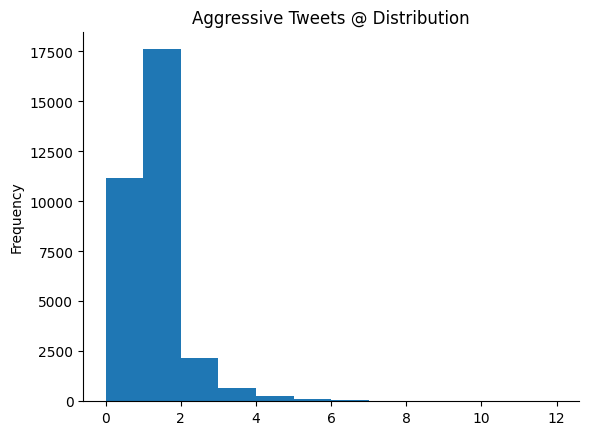

In [62]:
aggressive_tweets[aggressive_tweets['Label'] == "aggressive"]['@ count'].plot(kind='hist', bins=12, title='Aggressive Tweets @ Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

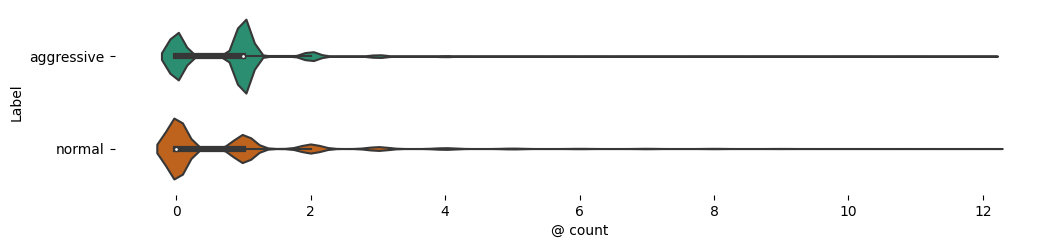

In [63]:
figsize = (12, 1.2 * len(aggressive_tweets['Label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(aggressive_tweets, x='@ count', y='Label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

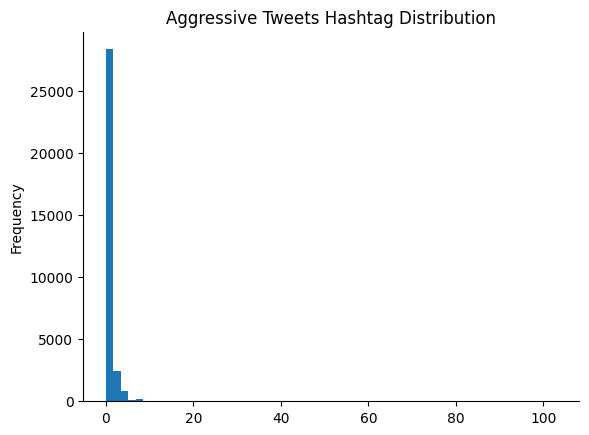

In [67]:
aggressive_tweets[aggressive_tweets['Label'] == "aggressive"]['Hashtag count'].plot(kind='hist', bins=60, title='Aggressive Tweets Hashtag Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

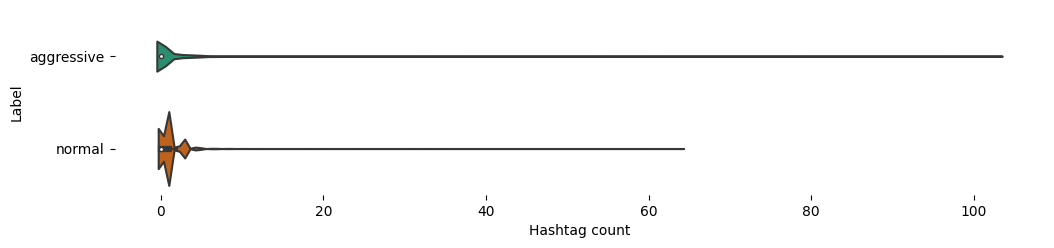

In [66]:
figsize = (12, 1.2 * len(aggressive_tweets['Label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(aggressive_tweets, x='Hashtag count', y='Label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [68]:
#Aggressive Tweets Retweet Distribution
aggressive_tweets[aggressive_tweets['Label'] == "aggressive"]['Retweet'].value_counts()

False    16693
True     15422
Name: Retweet, dtype: int64

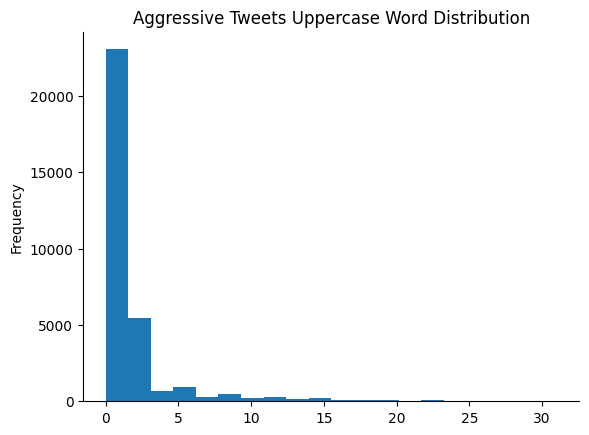

In [69]:
aggressive_tweets[aggressive_tweets['Label'] == "aggressive"]['Uppercase word count'].plot(kind='hist', bins=20, title='Aggressive Tweets Uppercase Word Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

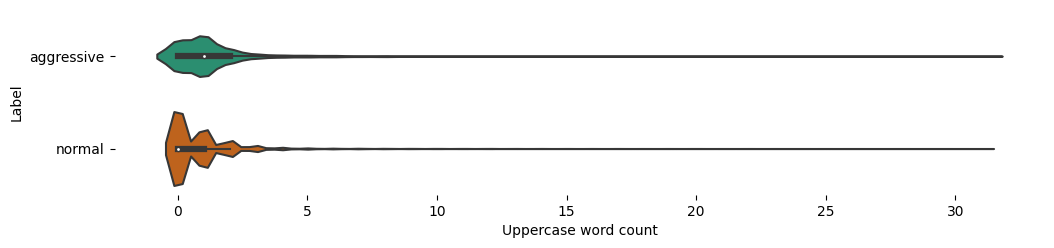

In [74]:
figsize = (12, 1.2 * len(aggressive_tweets['Label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(aggressive_tweets, x='Uppercase word count', y='Label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

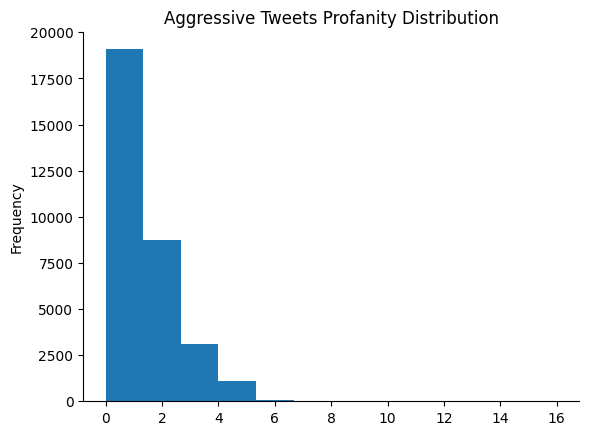

In [ ]:
aggressive_tweets[aggressive_tweets['Label'] == "aggressive"]['Profanity count'].plot(kind='hist', bins=12, title='Aggressive Tweets Profanity Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

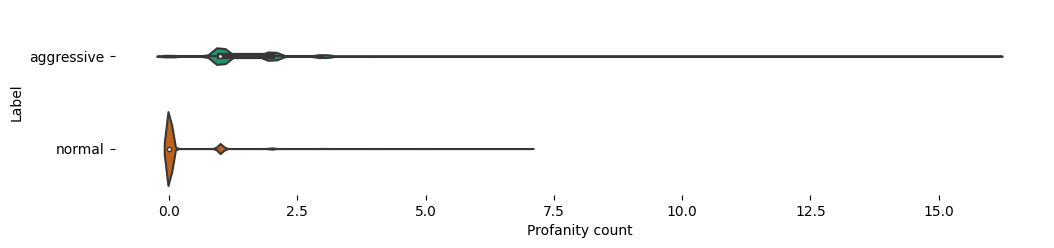

In [71]:
figsize = (12, 1.2 * len(aggressive_tweets['Label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(aggressive_tweets, x='Profanity count', y='Label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

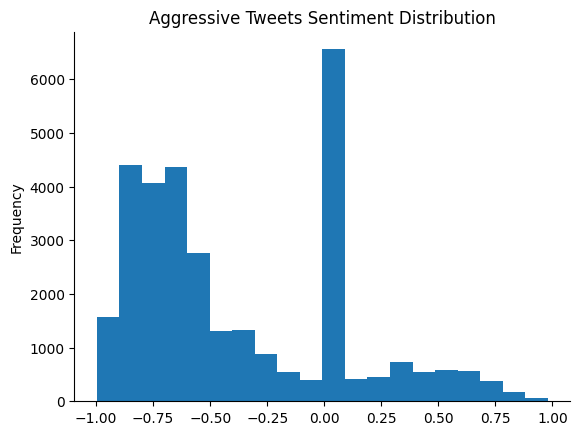

In [72]:
aggressive_tweets[aggressive_tweets['Label'] == "aggressive"]['Sentiment'].plot(kind='hist', bins=20, title='Aggressive Tweets Sentiment Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

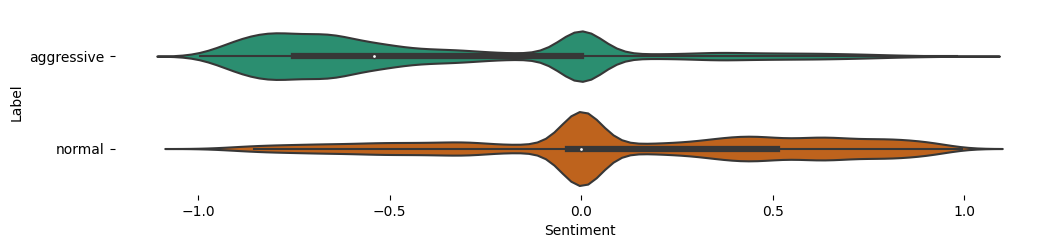

In [73]:
figsize = (12, 1.2 * len(aggressive_tweets['Label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(aggressive_tweets, x='Sentiment', y='Label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)